In [1]:
%ls

'2,3peak mix.ipynb'                    Untitled3.ipynb
'5peak 3 para when it worksss.ipynb'   Untitled4.ipynb
'Fitting_with_noise (1).ipynb'         Untitled5.ipynb
 ITO_O1s_bg.txt                        amp.csv
 ITO_O1s_exp.txt                       center.csv
 ITO_O1s_fitting.txt                   graph.csv
 ITO_O1s_p1.txt                        labels.png
 ITO_O1s_p2.txt                        model.png
 ITO_O1s_p3.txt                        model_shapes.png
 P3HT_S2p_bg.txt                       peak_number.csv
 P3HT_S2p_exp.txt                      width.csv
 P3HT_S2p_fitting.txt                 '논문 수정.ipynb'
 P3HT_S2p_p1.txt                      '데이터 얻기.ipynb'
 P3HT_S2p_p2.txt                      '저장된 데이터로 학습하기.ipynb'
 PeakDetection.ipynb                  '저장된 데이터로 학습하기2.ipynb'
 Untitled.ipynb                       '저장된 데이터로 학습하기3.ipynb'
 Untitled1.ipynb                      '저장된 데이터로 학습하기4.ipynb'
 Untitled2.ipynb


In [2]:
import pandas as pd
import numpy as np

In [3]:
graph = pd.read_csv('graph.csv').values[:,1:]
center= pd.read_csv('center.csv').values[:,1:]
width= pd.read_csv('width.csv').values[:,1:]
amp= pd.read_csv('amp.csv').values[:,1:]
peak_number= pd.read_csv('peak_number.csv').values[:,1:]

In [4]:
peak_number=peak_number.reshape(2000000,)

In [5]:
print(center[0:10])
print(width[0:10])
print(amp[0:10])
print(peak_number[0:10])
print(center.shape)
print(width.shape)
print(amp.shape)
print(peak_number.shape)
print(graph.shape)
print(graph)

[[ 0.          6.08688456 11.0810396 ]
 [ 5.07493349  8.25999368 11.36195096]
 [ 0.          2.67516221 10.60419171]
 [ 0.          5.54053864 12.23836258]
 [ 0.          4.08422309  7.21849474]
 [ 0.          7.30192691 12.34014272]
 [ 0.          2.54016398  5.16493207]
 [ 0.          4.67819908  6.09299318]
 [ 4.90655934  5.13202252 10.34134357]
 [ 0.          5.36008602  5.98285268]]
[[0.         1.24062404 0.95374601]
 [0.60456503 0.35785198 1.1738216 ]
 [0.         1.17339162 1.12952083]
 [0.         0.81456259 0.81987822]
 [0.         0.81681444 1.70560007]
 [0.         0.32207246 0.75414831]
 [0.         0.30486538 1.895045  ]
 [0.         0.59293989 0.4647601 ]
 [1.46428848 1.12931752 1.8841104 ]
 [0.         1.00584571 1.33599321]]
[[0.         0.21158879 0.18180892]
 [0.11125957 0.85593768 0.31159992]
 [0.         0.59012228 0.71652582]
 [0.         1.00856931 0.70388527]
 [0.         0.94976759 0.16667863]
 [0.         0.43501787 0.93207997]
 [0.         0.8393851  0.570734

In [6]:
import matplotlib.pyplot as plt
x = np.linspace(0, 15, 401) 
def y(a,b,c,x):
    beta = 5.09791537e-01
    gamma = 4.41140472e-01
    y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
#     y = c*(b**2)/((x-a)**2+b**2)
    return y



<ipython-input-6-74328273547d>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-74328273547d>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-74328273547d>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-74328273547d>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-74328273547d>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipytho

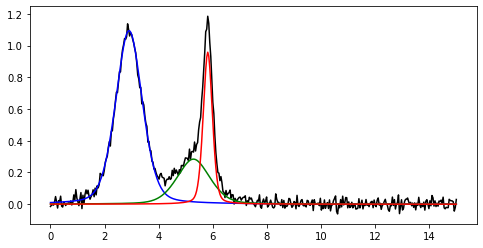

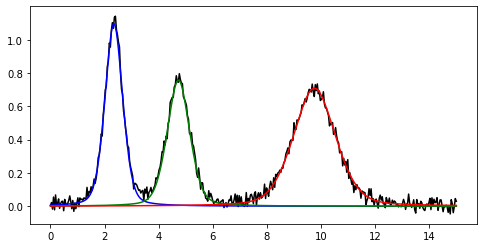

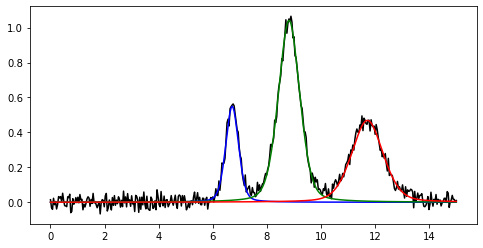

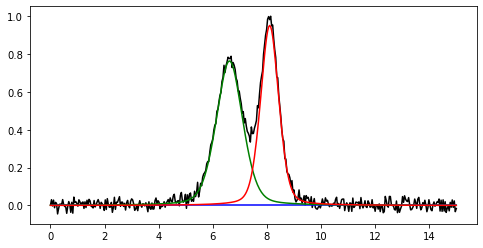

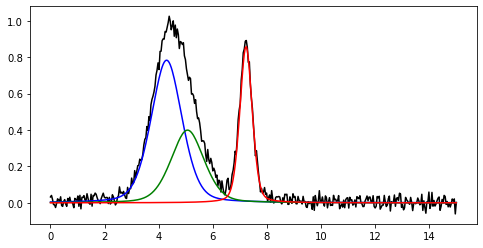

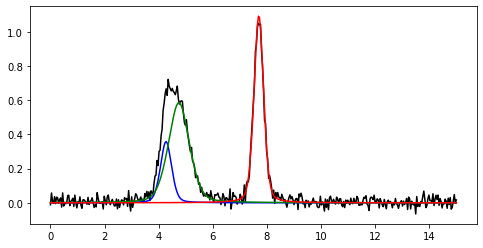

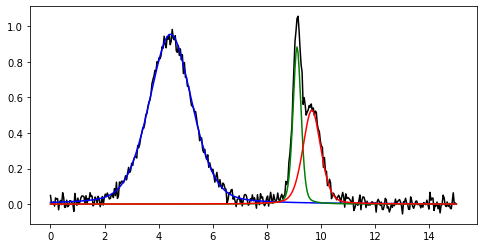

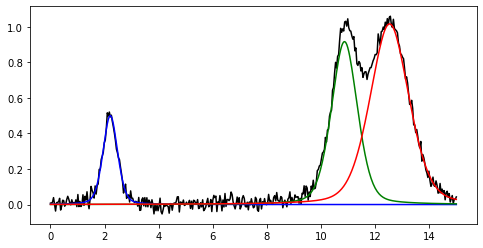

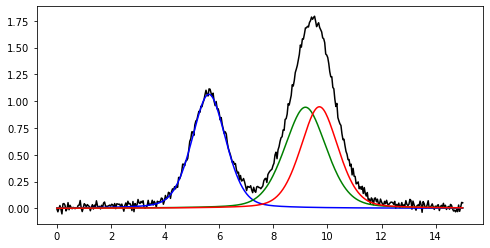

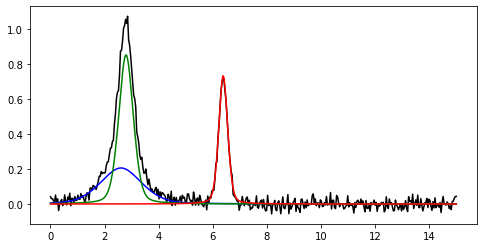

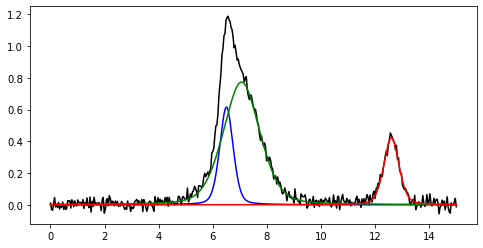

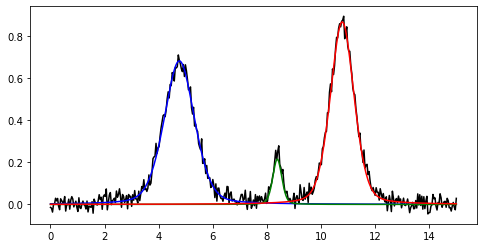

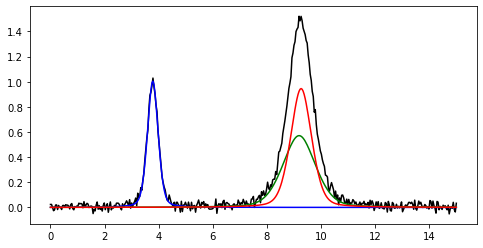

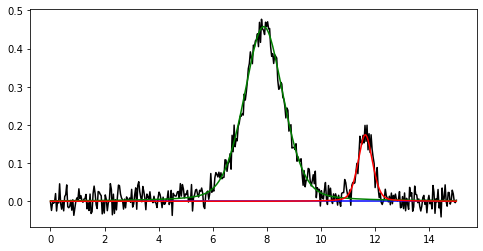

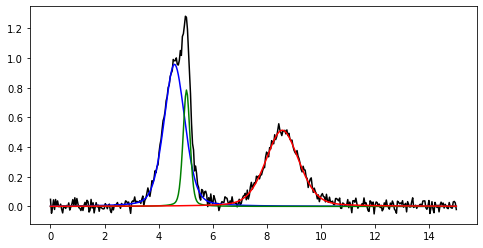

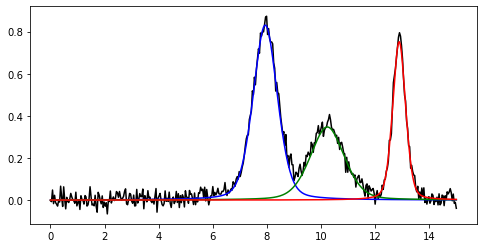

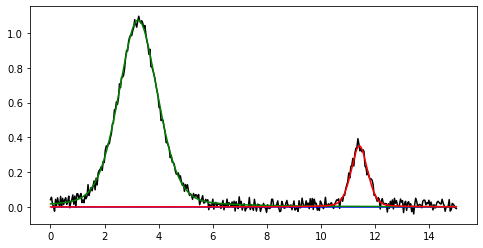

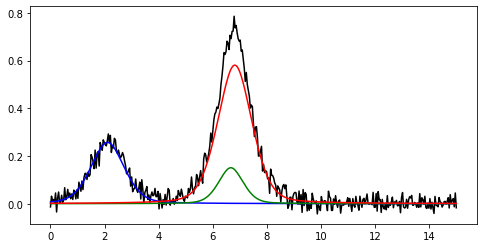

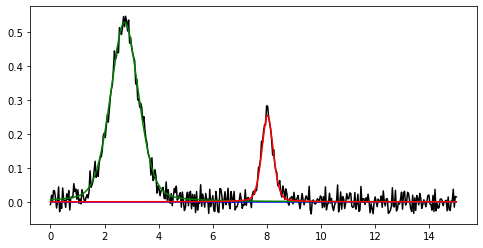

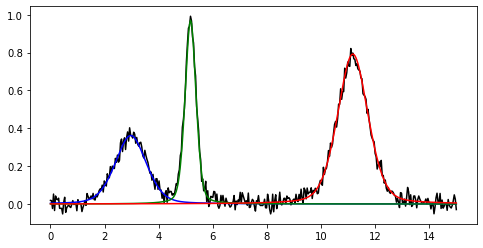

In [7]:
for i in range(20,40):
    plt.figure(figsize = (8,4))
    plt.plot(x,graph[i],color = 'black')
    plt.plot(x,y(center[i][0],width[i][0],amp[i][0],x), color = 'blue')
    plt.plot(x,y(center[i][1],width[i][1],amp[i][1],x), color= 'green')
    plt.plot(x,y(center[i][2],width[i][2],amp[i][2],x), color='red')

In [8]:
#90:9:1
data_number=1000000

train_graph = graph[:int(0.9*2*data_number)]
val_graph = graph[int(0.9*2*data_number):int(0.99*2*data_number)]
test_graph = graph[int(0.99*2*data_number):]

train_center = center[:int(0.9*2*data_number)]
val_center = center[int(0.9*2*data_number):int(0.99*2*data_number)]
test_center = center[int(0.99*2*data_number):]

train_width = width[:int(0.9*2*data_number)]
val_width = width[int(0.9*2*data_number):int(0.99*2*data_number)]
test_width = width[int(0.99*2*data_number):]

train_amp = amp[:int(0.9*2*data_number)]
val_amp = amp[int(0.9*2*data_number):int(0.99*2*data_number)]
test_amp = amp[int(0.99*2*data_number):]

train_peak_number = peak_number[:int(0.9*2*data_number)]
val_peak_number = peak_number[int(0.9*2*data_number):int(0.99*2*data_number)]
test_peak_number = peak_number[int(0.99*2*data_number):]

In [9]:
print(train_graph.shape, val_graph.shape, test_graph.shape)
print(train_center.shape, val_center.shape, test_center.shape)
print(train_width.shape, val_width.shape, test_width.shape)
print(train_amp.shape, val_amp.shape, test_amp.shape)
print(train_peak_number.shape, val_peak_number.shape, test_peak_number.shape)

(1800000, 401) (180000, 401) (20000, 401)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000,) (180000,) (20000,)


In [10]:
# conv1d 쓰기 위해 reshape 사용 
# 1차원 그래프 변환

train_graph = train_graph.reshape(train_graph.shape[0],train_graph.shape[1],1)
val_graph = val_graph.reshape(val_graph.shape[0],val_graph.shape[1],1)
test_graph = test_graph.reshape(test_graph.shape[0],test_graph.shape[1],1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(1800000, 401, 1)
(180000, 401, 1)
(20000, 401, 1)


In [11]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate
from keras import layers

In [12]:
len(x)

401

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 302, 128)     12928       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 151, 128)     0           conv1d_4[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 102, 128)     819328      max_pooling1d_4[0][0]            
____________________________________________________________________________________________

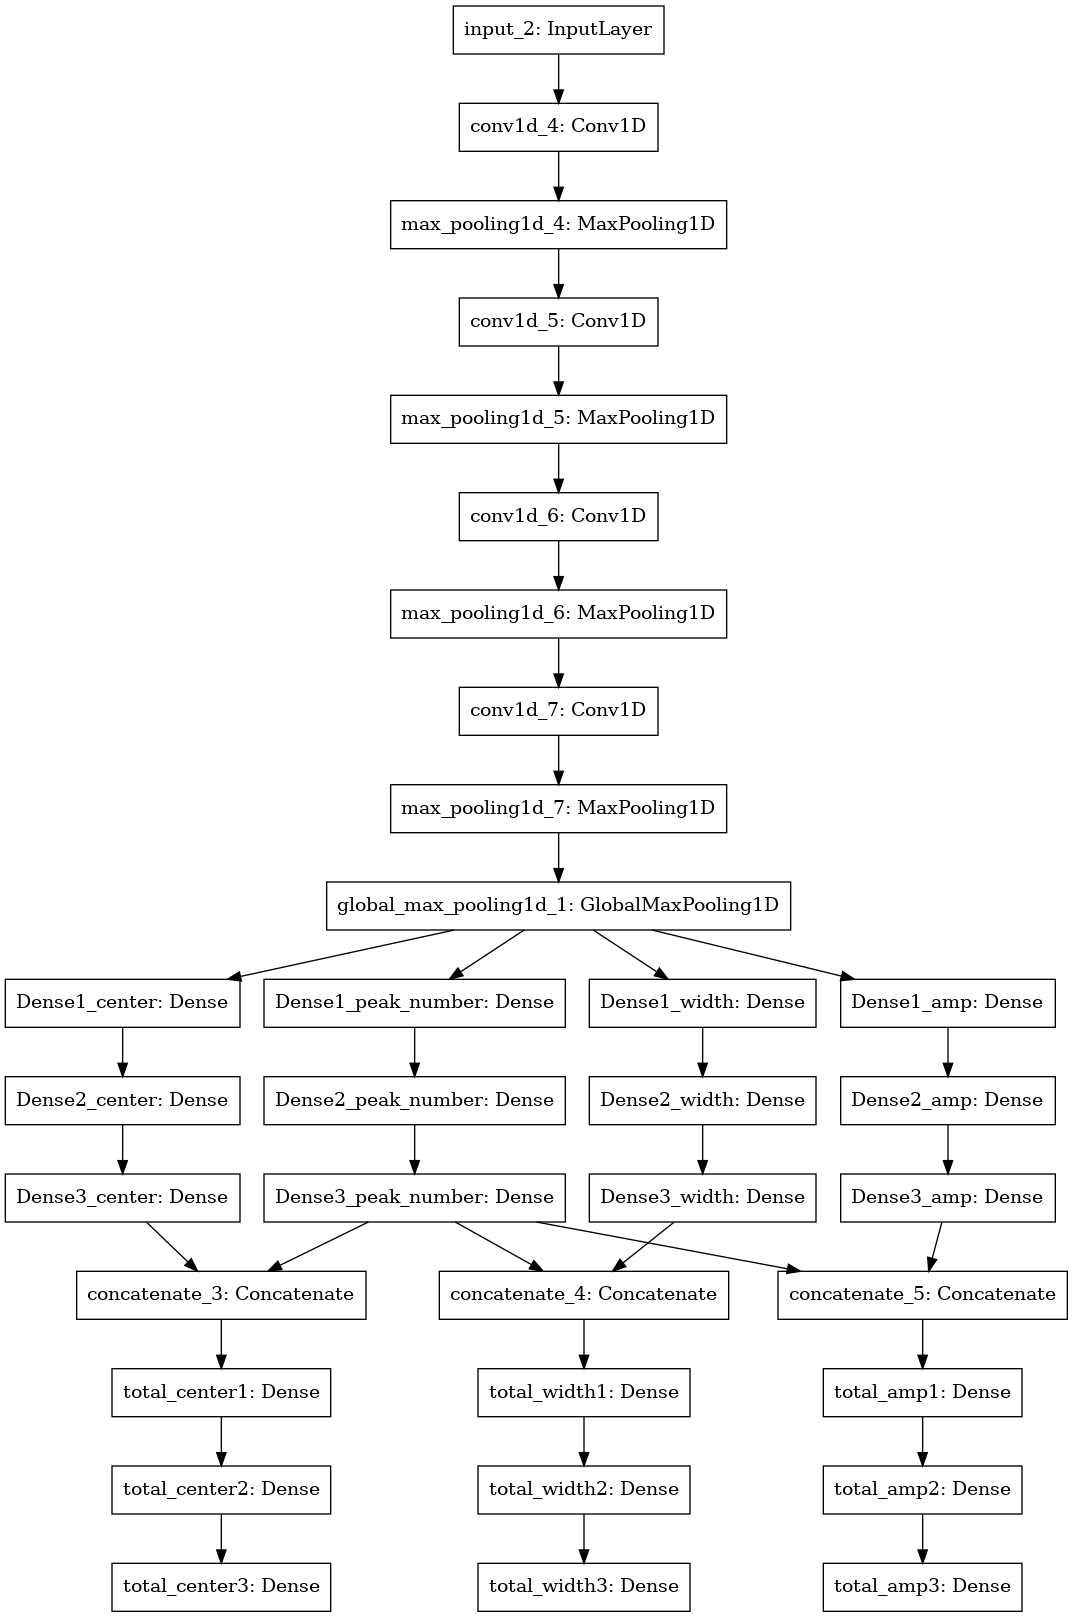

In [27]:

input_data = Input(shape = (len(x),1))
t = layers.Conv1D(128,100,activation = 'relu')(input_data)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,50,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,20,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(16,10,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)

t = layers.GlobalMaxPooling1D()(t)

Dense1_peak_number = Dense(200, activation = 'relu',name='Dense1_peak_number')(t)
Dense2_peak_number = Dense(200, activation = 'relu',name = 'Dense2_peak_number')(Dense1_peak_number)
Dense3_peak_number = Dense(1, activation = 'linear',name = 'Dense3_peak_number')(Dense2_peak_number)


Dense1_center = Dense(200, activation = 'relu',name='Dense1_center')(t)
Dense2_center = Dense(100, activation = 'relu',name='Dense2_center')(Dense1_center)
Dense3_center = Dense(40, activation = 'relu',name='Dense3_center')(Dense2_center)
# output_center = Dense(3, activation = 'linear',name='output_center')(Dense3_center)

Dense1_width = Dense(200,activation = 'relu',name='Dense1_width')(t)
Dense2_width = Dense(100,activation = 'relu',name='Dense2_width')(Dense1_width)
Dense3_width = Dense(40,activation = 'relu',name='Dense3_width')(Dense2_width)
# output_width = Dense(3,activation = 'linear',name='output_width')(Dense3_width)

Dense1_amp = Dense(200,activation = 'relu',name='Dense1_amp')(t)
Dense2_amp = Dense(100,activation = 'relu',name='Dense2_amp')(Dense1_amp)
Dense3_amp = Dense(40,activation = 'relu',name='Dense3_amp')(Dense2_amp)
# output_amp = Dense(3,activation = 'linear',name='output_amp')(Dense3_amp)

center_merge = concatenate([Dense3_peak_number,Dense3_center])
total_center1 = Dense(40, activation = 'relu',name = 'total_center1')(center_merge)
total_center2 = Dense(40, activation = 'relu',name = 'total_center2')(total_center1)
total_center3 = Dense(3, activation = 'linear',name = 'total_center3')(total_center2)


width_merge = concatenate([Dense3_peak_number,Dense3_width])
total_width1 = Dense(40, activation = 'relu',name = 'total_width1')(width_merge)
total_width2 = Dense(40, activation = 'relu',name = 'total_width2')(total_width1)
total_width3 = Dense(3, activation = 'linear',name = 'total_width3')(total_width2)


amp_merge = concatenate([Dense3_peak_number,Dense3_amp])
total_amp1 = Dense(40, activation = 'relu',name = 'total_amp1')(amp_merge)
total_amp2 = Dense(40, activation = 'relu',name = 'total_amp2')(total_amp1)
total_amp3 = Dense(3, activation = 'linear',name = 'total_amp3')(total_amp2)


model = Model(inputs = input_data,
              outputs = [Dense3_peak_number,total_center3,total_width3,total_amp3])
print(model.summary())
plot_model(model)

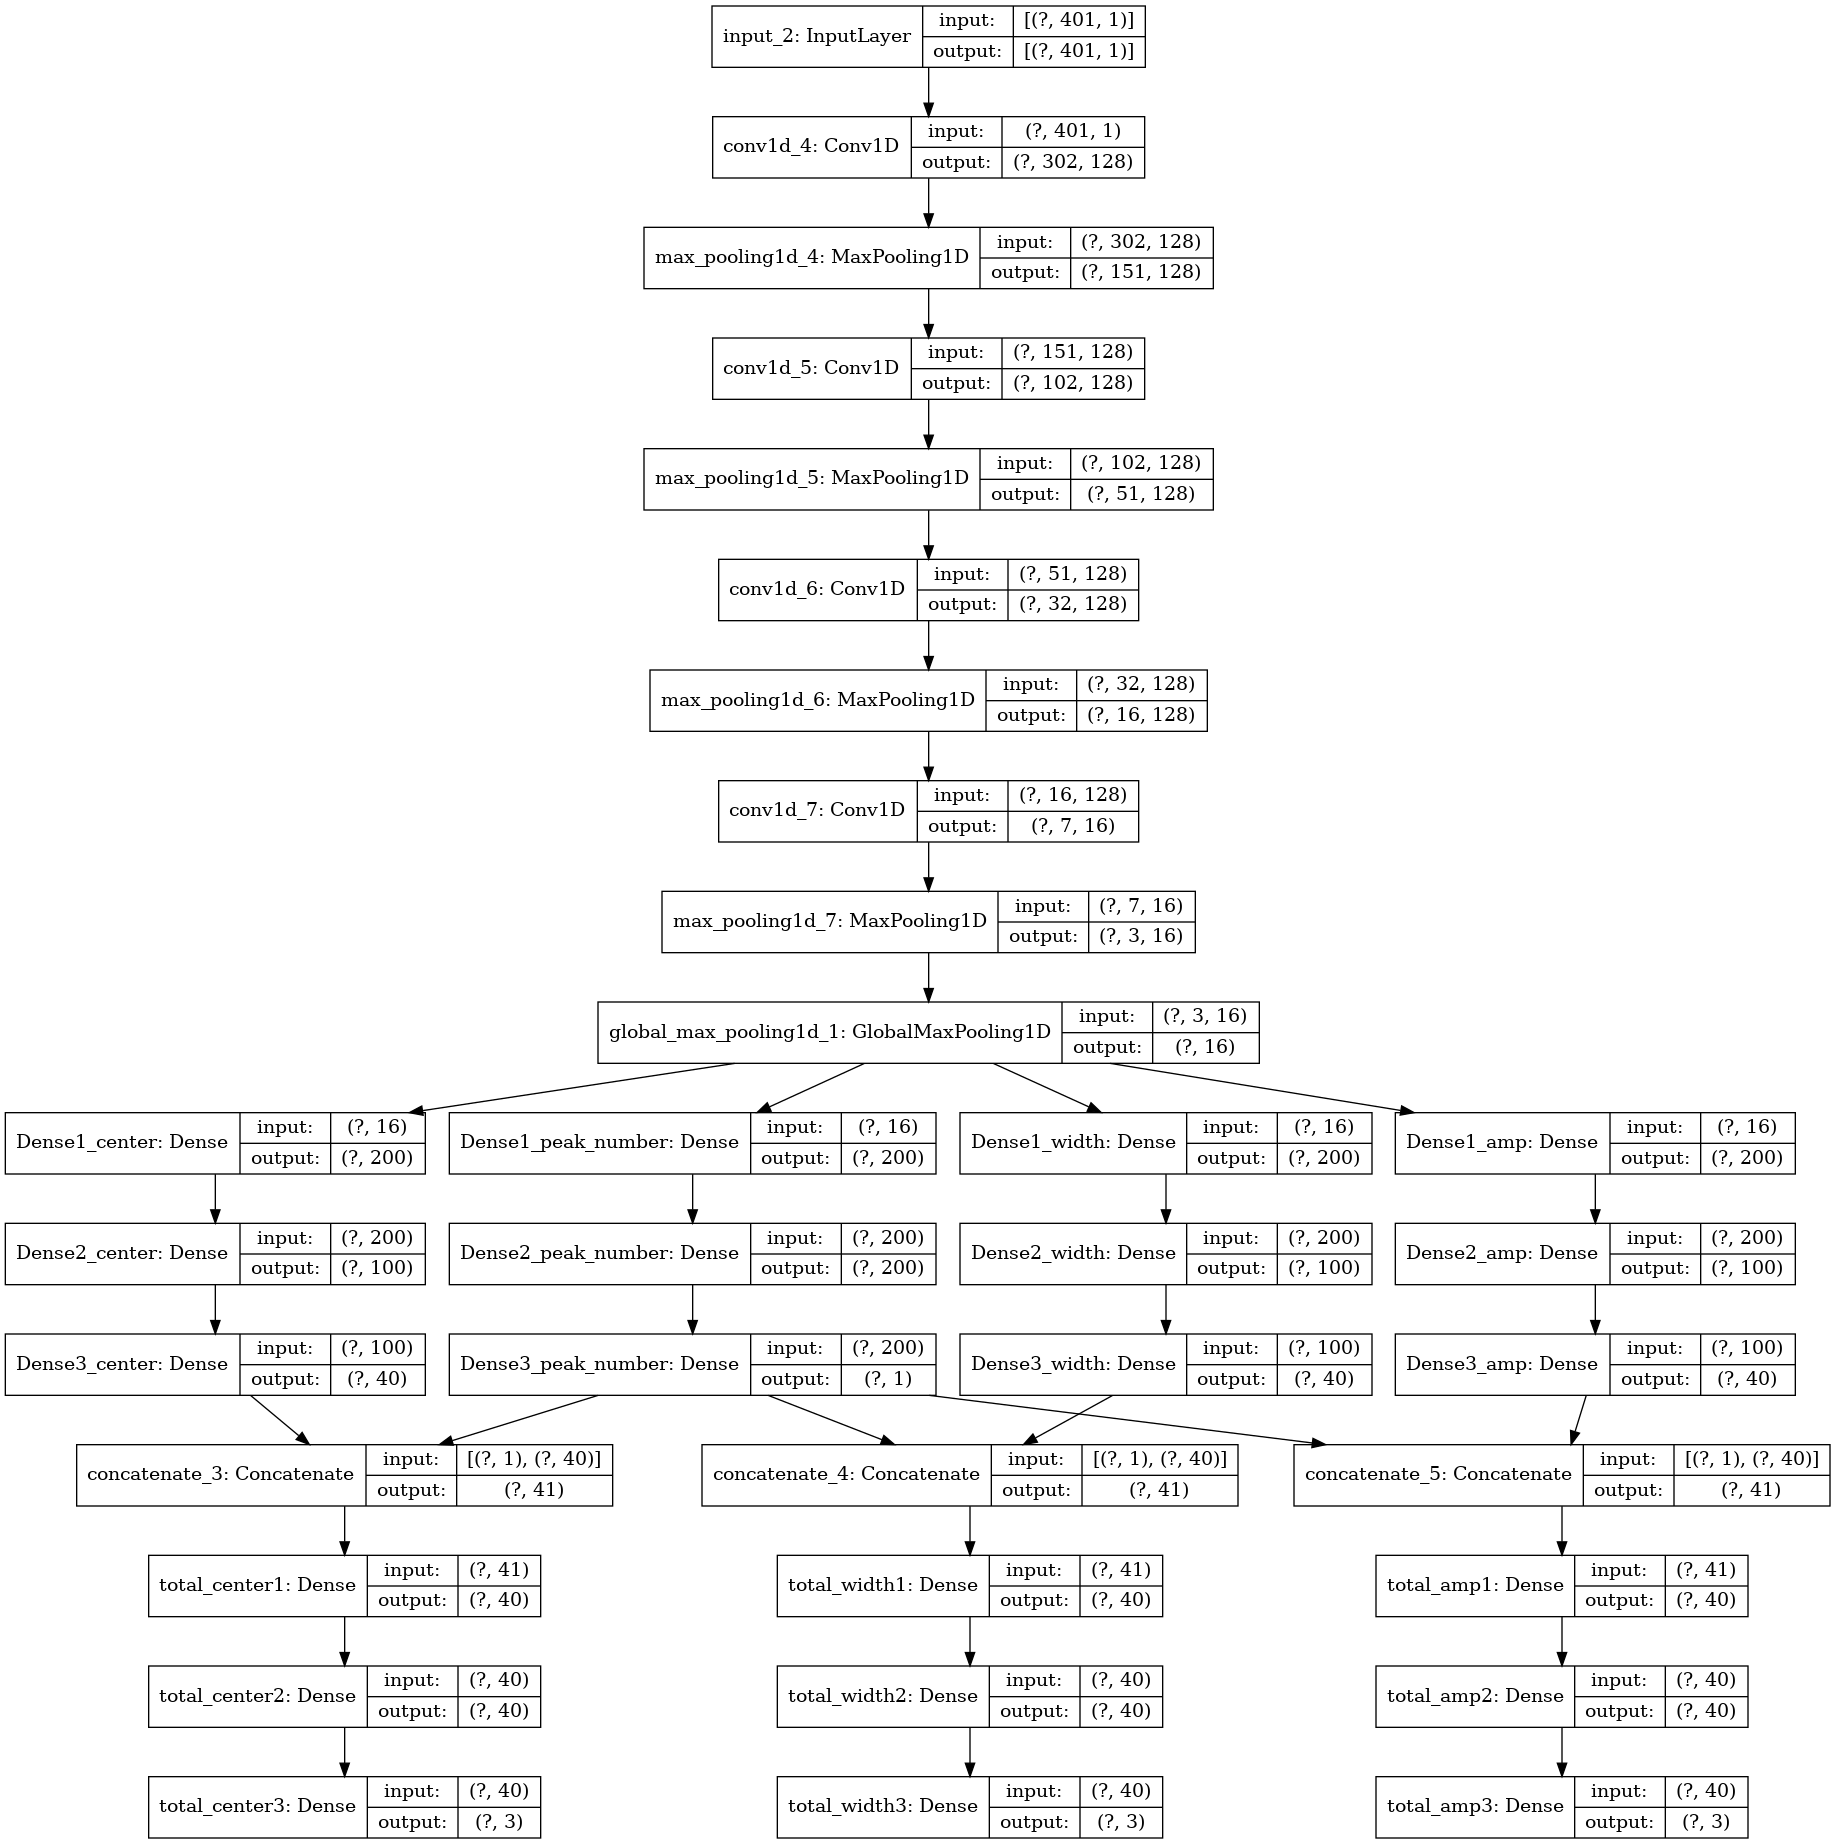

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'labels.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [31]:
model.compile(optimizer='adam',
              loss = {'total_center3' : 'mse',
                      'total_width3' : 'mse',
                      'total_amp3' : 'mse',
                      'Dense3_peak_number' : 'mse'},
              loss_weights={'total_center3' : 0.5,
                           'total_width3' : 1,
                           'total_amp3' : 1,
                            'Dense3_peak_number' :1 },
              metrics = ['mae'])

In [32]:
models=model.fit(train_graph, [train_peak_number,train_center , train_width, train_amp],
          epochs = 50,
          batch_size = 1000,
          validation_data = (val_graph, [val_peak_number, val_center, val_width, val_amp]))

Epoch 1/50
1800/1800 [==============================] - 94s 52ms/step - loss: 1.5316 - Dense3_peak_number_loss: 0.1377 - total_center3_loss: 2.2378 - total_width3_loss: 0.2002 - total_amp3_loss: 0.0748 - Dense3_peak_number_mae: 0.2540 - total_center3_mae: 0.9036 - total_width3_mae: 0.3595 - total_amp3_mae: 0.2216 - val_loss: 0.4317 - val_Dense3_peak_number_loss: 0.0217 - val_total_center3_loss: 0.4337 - val_total_width3_loss: 0.1316 - val_total_amp3_loss: 0.0615 - val_Dense3_peak_number_mae: 0.0824 - val_total_center3_mae: 0.3698 - val_total_width3_mae: 0.2797 - val_total_amp3_mae: 0.1971
Epoch 2/50
1800/1800 [==============================] - 95s 53ms/step - loss: 0.3351 - Dense3_peak_number_loss: 0.0152 - total_center3_loss: 0.3713 - total_width3_loss: 0.0766 - total_amp3_loss: 0.0577 - Dense3_peak_number_mae: 0.0535 - total_center3_mae: 0.3241 - total_width3_mae: 0.1918 - total_amp3_mae: 0.1868 - val_loss: 0.3234 - val_Dense3_peak_number_loss: 0.0102 - val_total_center3_loss: 0.3608

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1800/1800 [==============================] - 94s 52ms/step - loss: 0.0782 - Dense3_peak_number_loss: 0.0013 - total_center3_loss: 0.0492 - total_width3_loss: 0.0225 - total_amp3_loss: 0.0298 - Dense3_peak_number_mae: 0.0119 - total_center3_mae: 0.1076 - total_width3_mae: 0.0980 - total_amp3_mae: 0.1192 - val_loss: 0.0908 - val_Dense3_peak_number_loss: 0.0016 - val_total_center3_loss: 0.0716 - val_total_width3_loss: 0.0237 - val_total_amp3_loss: 0.0296 - val_Dense3_peak_number_mae: 0.0121 - val_total_center3_mae: 0.1083 - val_total_width3_mae: 0.0998 - val_total_amp3_mae: 0.1180
Epoch 38/50
1800/1800 [==============================] - 94s 52ms/step - loss: 0.0795 - Dense3_peak_number_loss: 0.0015 - total_center3_loss: 0.0511 - total_width3_loss: 0.0227 - total_amp3_loss: 0.0298 - Dense3_peak_number_mae: 0.0129 - total_center3_mae: 0.1104 - total_width3_mae: 0.0984 - total_amp3_mae: 0.1193 - val_loss: 0.0912 - val_Dense3_peak_number_loss: 0.0016 - val_total_center3_loss: 0.0749 - val_tot

In [33]:
test_graph.shape

(20000, 401, 1)

In [34]:
for key in models.history.keys():
    print(key)

loss
Dense3_peak_number_loss
total_center3_loss
total_width3_loss
total_amp3_loss
Dense3_peak_number_mae
total_center3_mae
total_width3_mae
total_amp3_mae
val_loss
val_Dense3_peak_number_loss
val_total_center3_loss
val_total_width3_loss
val_total_amp3_loss
val_Dense3_peak_number_mae
val_total_center3_mae
val_total_width3_mae
val_total_amp3_mae


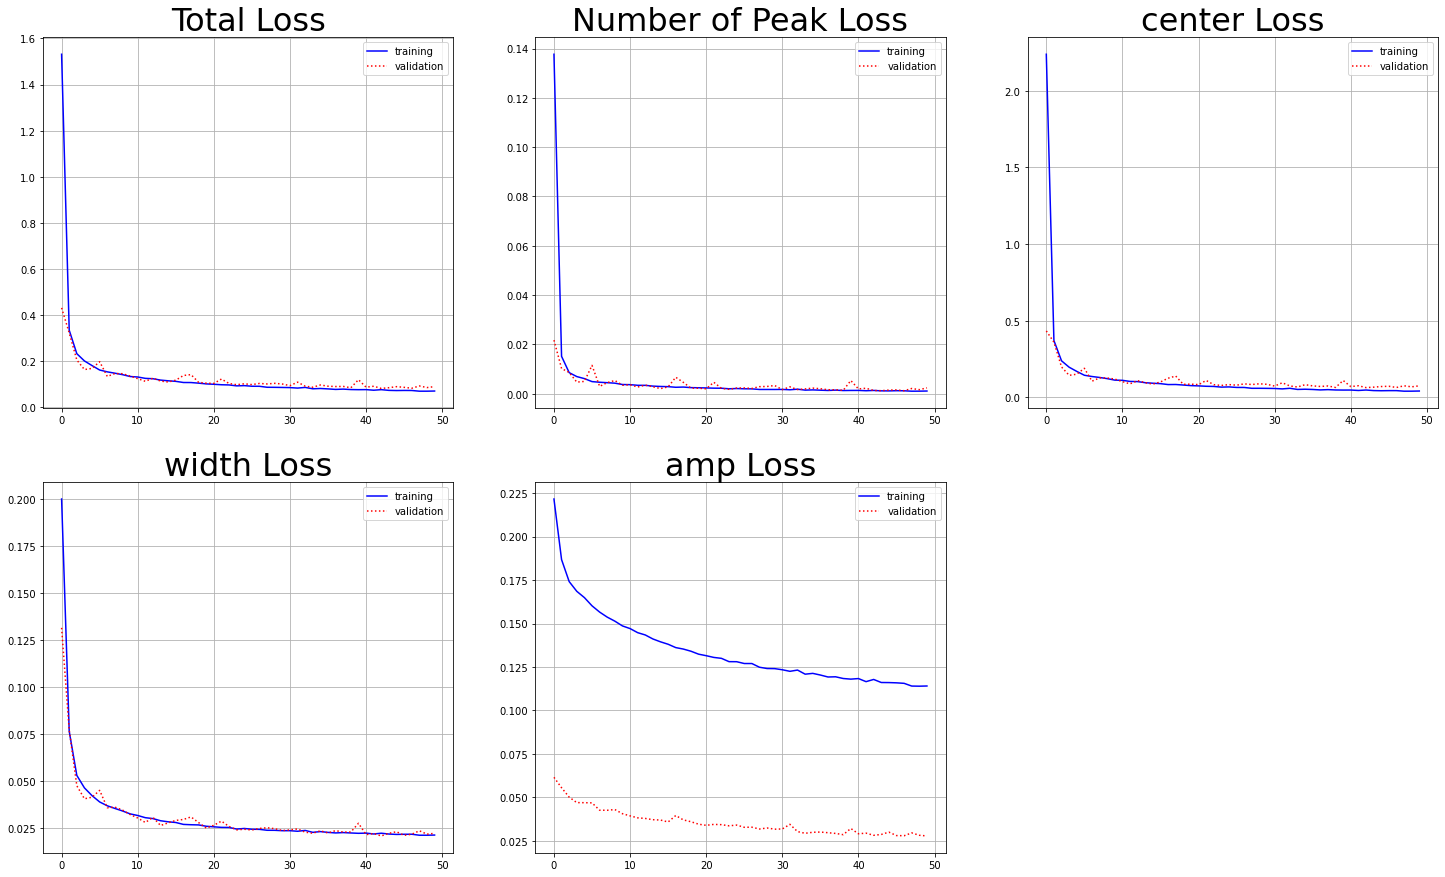

In [35]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(models.history['loss'], 'b-', label = 'training')
plt.plot(models.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()


plt.subplot(232)
plt.plot(models.history['Dense3_peak_number_loss'], 'b-', label = 'training')
plt.plot(models.history['val_Dense3_peak_number_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(models.history['total_center3_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_center3_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("center Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(models.history['total_width3_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_width3_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("width Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(models.history['total_amp3_mae'], 'b-', label = 'training')
plt.plot(models.history['val_total_amp3_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("amp Loss", size = 32)
plt.legend()


In [36]:
prediction = model.predict(test_graph)
print(len(prediction))

4


In [37]:
print(prediction[0].shape)
print(prediction[1].shape)# if center
print(prediction[2].shape)# width
print(prediction[3].shape)# amp

(20000, 1)
(20000, 3)
(20000, 3)
(20000, 3)


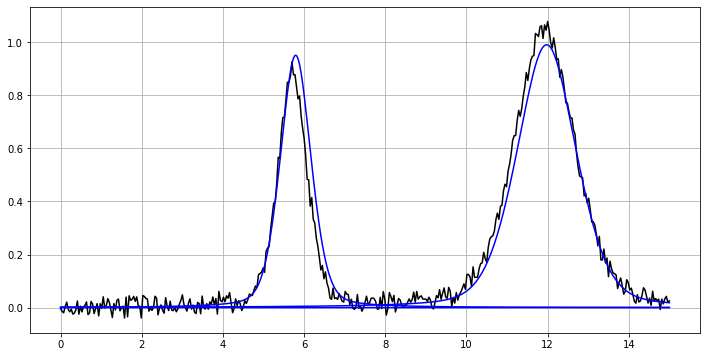

real_center   [ 0.          5.71315308 11.91923309]
predict_center [ -0.0043388456 5.7911735 11.97598 ]
---------------
real_width    [0.         0.84337558 1.79121459]
predict_center [ 0.010870919 0.90142703 1.7443155 ]
---------------
real_amp      [0.         0.88023975 1.04841723]
predict_center [ -0.010365628 0.95215267 0.99134314 ]


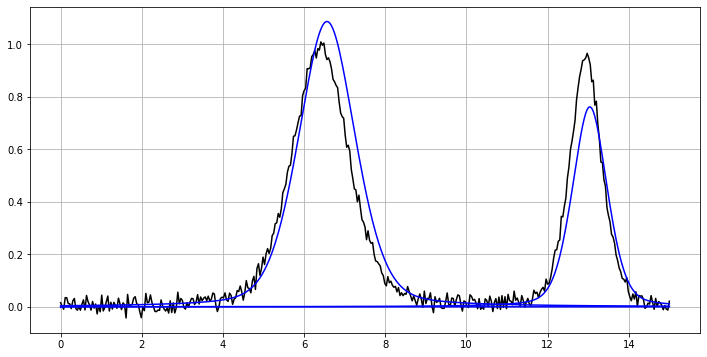

real_center   [ 0.          6.39994478 12.93951819]
predict_center [ -0.0029352158 6.5630736 13.039961 ]
---------------
real_width    [0.         1.65652237 0.93438808]
predict_center [ 0.0041598976 1.6717393 1.0203613 ]
---------------
real_amp      [0.         0.99348086 0.9478093 ]
predict_center [ -0.0074085817 1.086889 0.7618761 ]


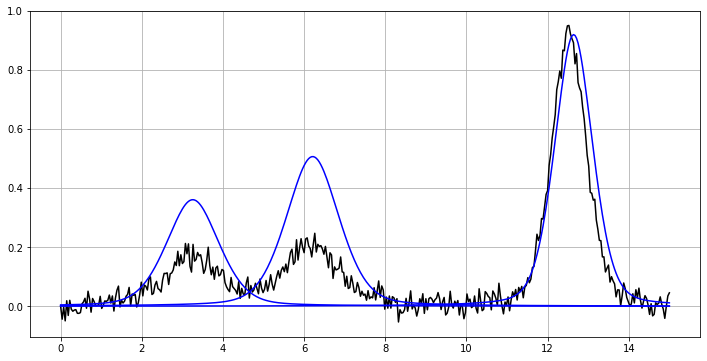

real_center   [ 3.23631434  6.18606995 12.52827948]
predict_center [ 3.2558262 6.210762 12.642081 ]
---------------
real_width    [1.66278035 1.68069287 1.00126402]
predict_center [ 1.5380111 1.5496879 1.1150885 ]
---------------
real_amp      [0.17531519 0.19742663 0.9243484 ]
predict_center [ 0.36066493 0.5066222 0.9194745 ]


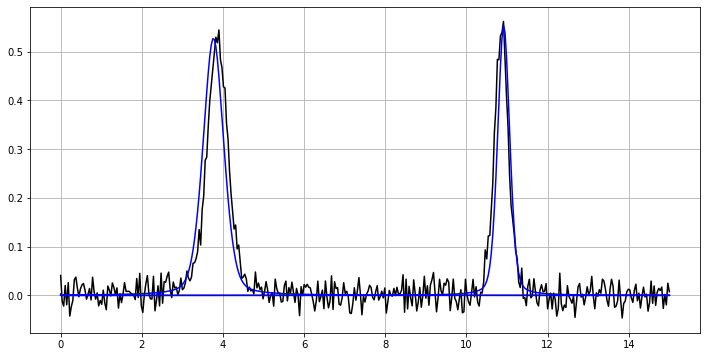

real_center   [ 0.          3.86715569 10.86221601]
predict_center [ -0.0015196651 3.7651691 10.917887 ]
---------------
real_width    [0.         0.59165533 0.40581259]
predict_center [ -0.0030169114 0.6046456 0.35321614 ]
---------------
real_amp      [0.         0.51955378 0.53934786]
predict_center [ 0.0060644373 0.5275531 0.5544741 ]


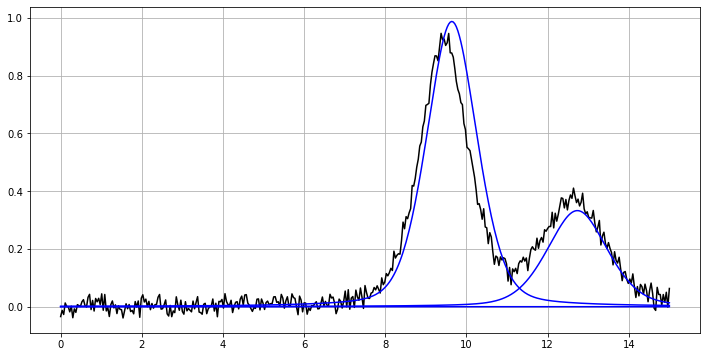

real_center   [ 0.          9.45233636 12.62868582]
predict_center [ -0.00094537437 9.639819 12.732851 ]
---------------
real_width    [0.         1.44668865 1.87998592]
predict_center [ 0.00903637 1.486443 1.7686976 ]
---------------
real_amp      [0.         0.91245941 0.36050666]
predict_center [ -0.00031993538 0.987124 0.33254722 ]


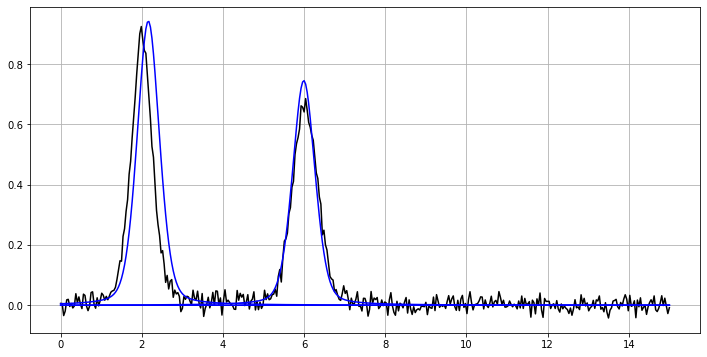

real_center   [0.         2.00332775 6.03248714]
predict_center [ 0.030268908 2.1603742 5.9916534 ]
---------------
real_width    [0.         0.59737084 0.7272154 ]
predict_center [ 0.0033663362 0.654884 0.66135514 ]
---------------
real_amp      [0.         0.90353073 0.66262424]
predict_center [ -0.0012176633 0.9425325 0.74512124 ]


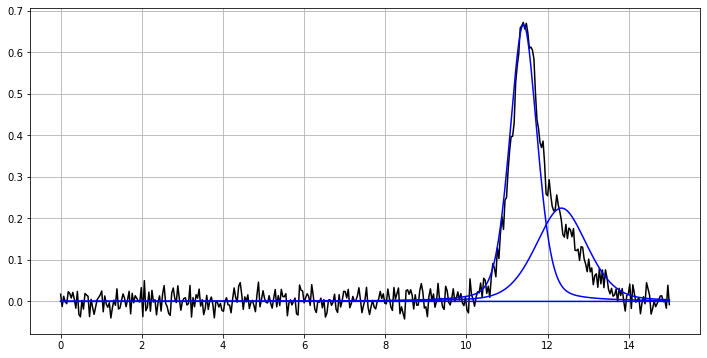

real_center   [ 0.         11.42268043 12.25882526]
predict_center [ -0.013960883 11.405446 12.34129 ]
---------------
real_width    [0.         0.75334379 1.47571775]
predict_center [ 0.004208818 0.8058242 1.5183918 ]
---------------
real_amp      [0.         0.59638167 0.17278906]
predict_center [ 0.0008171201 0.6667402 0.22460401 ]


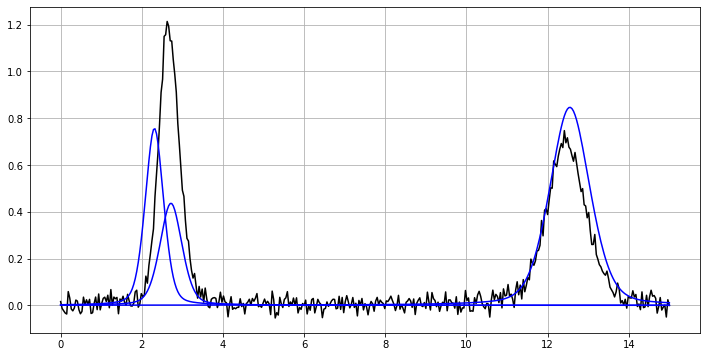

real_center   [ 2.57538501  2.73040878 12.45116549]
predict_center [ 2.311167 2.7184312 12.547875 ]
---------------
real_width    [0.41405293 0.60919744 1.12779081]
predict_center [ 0.53961927 0.64684737 1.1764119 ]
---------------
real_amp      [0.5085511  0.80758984 0.70893355]
predict_center [ 0.7564948 0.43653712 0.8465947 ]


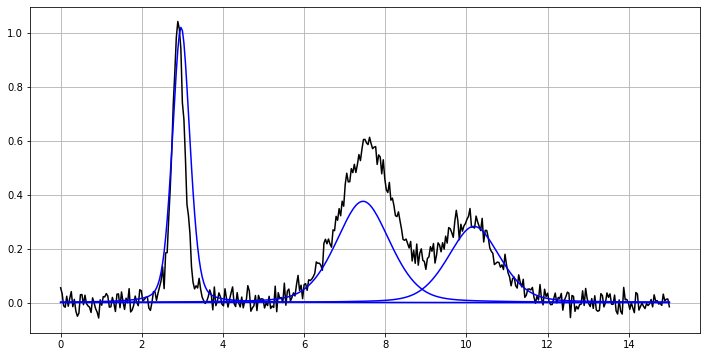

real_center   [ 2.9017155   7.54113871 10.03829508]
predict_center [ 2.969546 7.4522176 10.186648 ]
---------------
real_width    [0.3609779 1.5868491 1.5857514]
predict_center [ 0.51224416 1.5891755 1.5328192 ]
---------------
real_amp      [0.9967733  0.57811673 0.29408781]
predict_center [ 1.0196648 0.37505066 0.28218585 ]


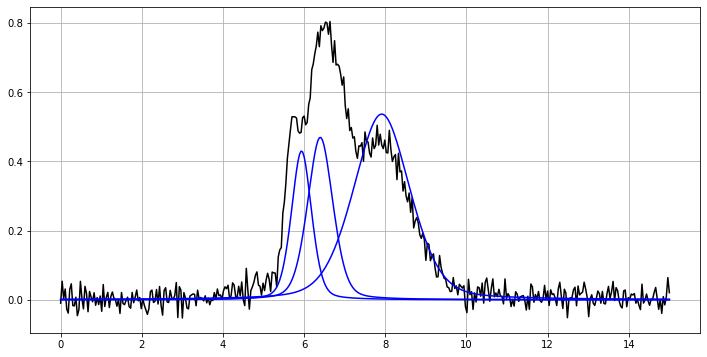

real_center   [5.70187413 6.47325447 7.95269075]
predict_center [ 5.935689 6.3975267 7.911532 ]
---------------
real_width    [0.35270478 1.15793397 1.67777024]
predict_center [ 0.58857703 0.7461577 1.6628457 ]
---------------
real_amp      [0.28978847 0.72433166 0.41654231]
predict_center [ 0.42975736 0.46916756 0.53603464 ]


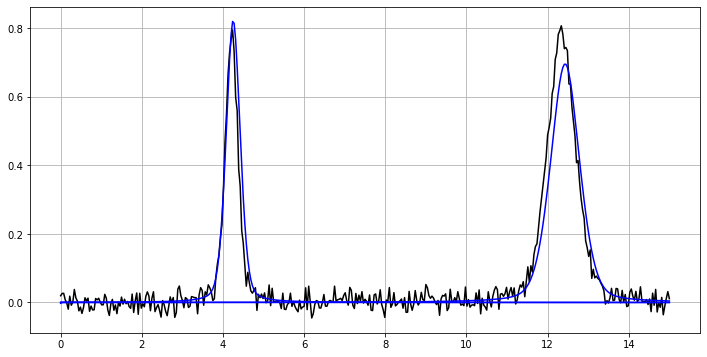

real_center   [ 0.          4.21687094 12.34120659]
predict_center [ -0.004239425 4.2517047 12.431527 ]
---------------
real_width    [0.         0.36773928 0.81390437]
predict_center [ 0.009267576 0.41306958 0.84777284 ]
---------------
real_amp      [0.         0.78705796 0.79347587]
predict_center [ -0.004408531 0.82355964 0.69645965 ]


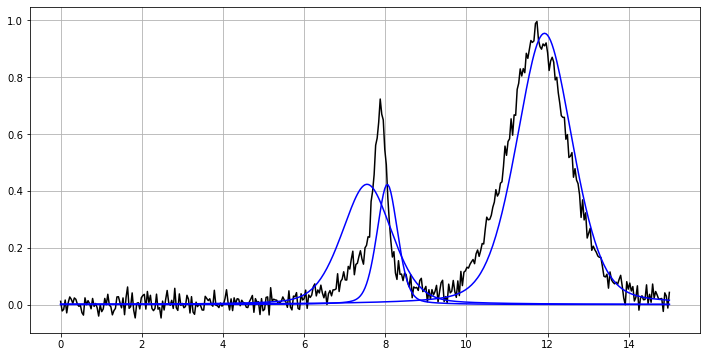

real_center   [ 7.64690374  7.88672447 11.75998207]
predict_center [ 7.5504107 8.049898 11.923731 ]
---------------
real_width    [1.57721792 0.35065511 1.76987164]
predict_center [ 1.4755388 0.6111152 1.6548427 ]
---------------
real_amp      [0.15874303 0.52349397 0.94926077]
predict_center [ 0.42315602 0.42262924 0.9543967 ]


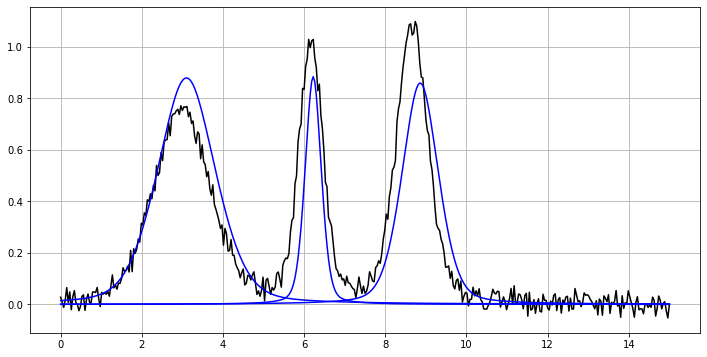

real_center   [2.97550177 6.17211837 8.66438667]
predict_center [ 3.1005757 6.2235236 8.861215 ]
---------------
real_width    [1.63453699 0.70265382 0.91474209]
predict_center [ 1.6971161 0.47358766 1.0668166 ]
---------------
real_amp      [0.76022675 1.01366238 1.09569614]
predict_center [ 0.8790919 0.88386065 0.85925114 ]


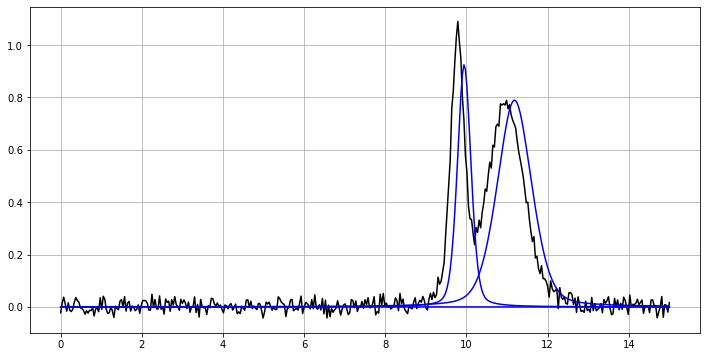

real_center   [ 0.          9.77946893 10.97017916]
predict_center [ 0.009222344 9.943874 11.183553 ]
---------------
real_width    [0.         0.39829634 1.05510464]
predict_center [ 0.011958584 0.39586025 1.0113021 ]
---------------
real_amp      [0.         1.01298834 0.78358955]
predict_center [ 0.0035643727 0.92535096 0.78963184 ]


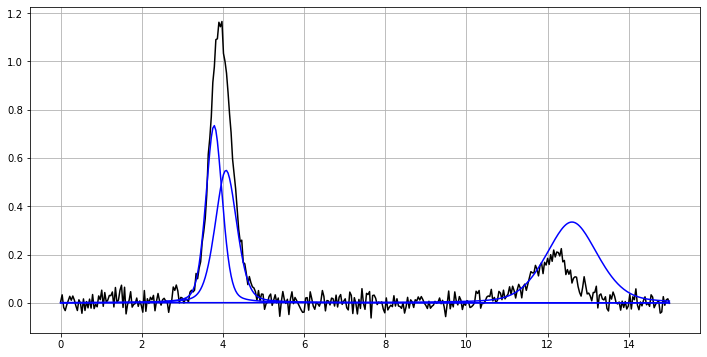

real_center   [ 3.8569353   4.12070216 12.11402843]
predict_center [ 3.7816377 4.0752616 12.599836 ]
---------------
real_width    [0.4981711  0.58429175 1.10961953]
predict_center [ 0.47935307 0.63534164 1.5115017 ]
---------------
real_amp      [0.83741193 0.49685655 0.19540706]
predict_center [ 0.7340465 0.5487008 0.33459458 ]


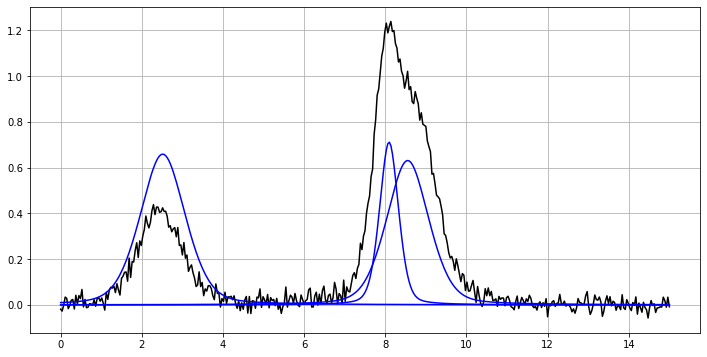

real_center   [2.4287244  8.00130851 8.73111697]
predict_center [ 2.5155709 8.092639 8.552058 ]
---------------
real_width    [1.30205305 0.73029477 1.26629847]
predict_center [ 1.3259153 0.55495656 1.24172 ]
---------------
real_amp      [0.414536   0.85436318 0.82462015]
predict_center [ 0.6586175 0.71121913 0.630726 ]


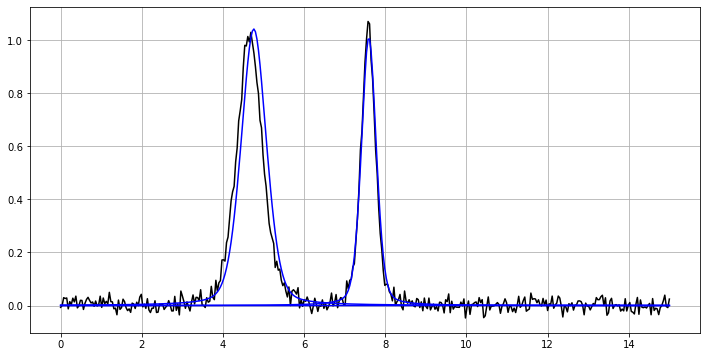

real_center   [0.         4.6604788  7.58096173]
predict_center [ 0.0048719198 4.759513 7.594731 ]
---------------
real_width    [0.         0.74087437 0.40953535]
predict_center [ 0.0021222532 0.7410033 0.43532985 ]
---------------
real_amp      [0.         1.0195198  1.04926695]
predict_center [ -0.010428794 1.0416625 1.0099943 ]


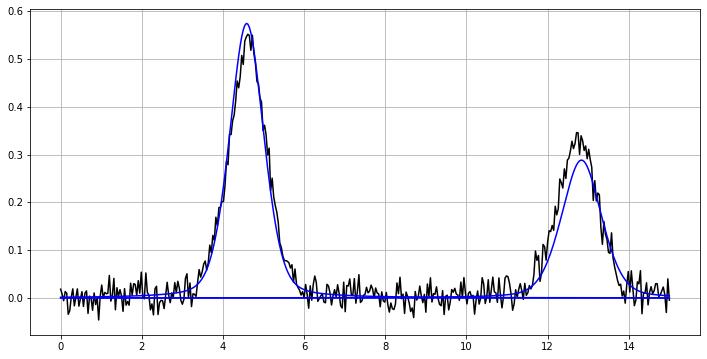

real_center   [ 0.          4.61549707 12.73793585]
predict_center [ -0.00062970817 4.5848093 12.834372 ]
---------------
real_width    [0.         1.11693444 1.17194019]
predict_center [ 0.00027893484 1.0036268 1.177328 ]
---------------
real_amp      [0.         0.53062024 0.33579517]
predict_center [ 0.0018821508 0.5743279 0.28838167 ]


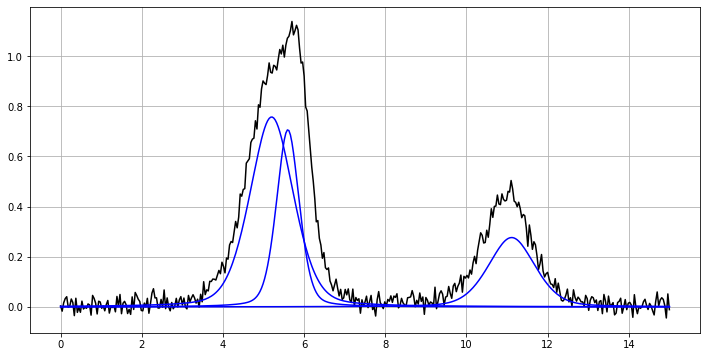

real_center   [ 5.12023748  5.84530511 10.99748078]
predict_center [ 5.1995535 5.5996213 11.114112 ]
---------------
real_width    [1.34057725 0.74437628 1.38113455]
predict_center [ 1.2785907 0.6659313 1.3682392 ]
---------------
real_amp      [0.84935913 0.70472954 0.46106577]
predict_center [ 0.75721705 0.70640606 0.27658686 ]


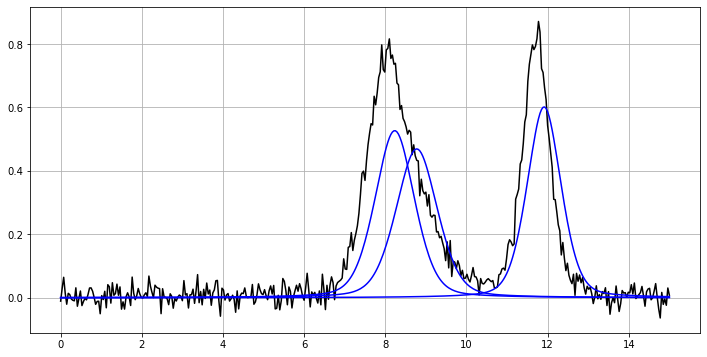

real_center   [ 8.0085005   8.9801749  11.72798113]
predict_center [ 8.232754 8.77488 11.9131975 ]
---------------
real_width    [1.09531881 1.22843115 0.76551006]
predict_center [ 1.1570598 1.2167436 0.9962611 ]
---------------
real_amp      [0.71929417 0.23130514 0.83006498]
predict_center [ 0.526789 0.46920544 0.60169756 ]


In [38]:
for i in range(30,50):

    plt.figure(figsize=(12,6))
    plt.plot(x,test_graph[i] ,color='black')
    plt.plot(x,y(prediction[1][i][0],prediction[2][i][0],prediction[3][i][0],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][1],prediction[2][i][1],prediction[3][i][1],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][2],prediction[2][i][2],prediction[3][i][2],x),color = 'blue')
    plt.grid(True)
    plt.show()
    print('real_center  ',test_center[i])
    print('predict_center','[',prediction[1][i][0],prediction[1][i][1],prediction[1][i][2],']')
    print('---------------')
    print('real_width   ',test_width[i])
    print('predict_center','[',prediction[2][i][0],prediction[2][i][1],prediction[2][i][2],']')
    print('---------------')
    print('real_amp     ',test_amp[i])
    print('predict_center','[',prediction[3][i][0],prediction[3][i][1],prediction[3][i][2],']')
    
    

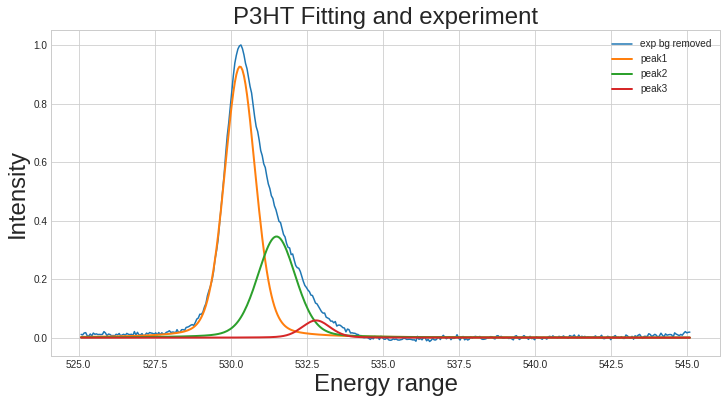

In [39]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

(1, 401, 1)


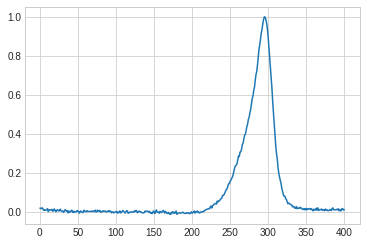

In [40]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)
plt.plot(test_result[0])

In [41]:
predict = model.predict(test_result)
print(predict)

[array([[1.9987609]], dtype=float32), array([[ 0.01642533, 10.238921  , 11.163023  ]], dtype=float32), array([[4.4073910e-04, 1.6061132e+00, 8.5047650e-01]], dtype=float32), array([[-0.00970066,  0.43291575,  0.8903512 ]], dtype=float32)]


In [42]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [43]:
print(new_predict[0].shape)  # num_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


In [44]:
peak_1 = [new_predict[1][0], new_predict[2][0], new_predict[3][0]]
peak_2 = [new_predict[1][1], new_predict[2][1], new_predict[3][1]]
peak_3 = [new_predict[1][2], new_predict[2][2], new_predict[3][2]]

Text(0.5, 1.0, 'Network fitting vs real XPS graph')

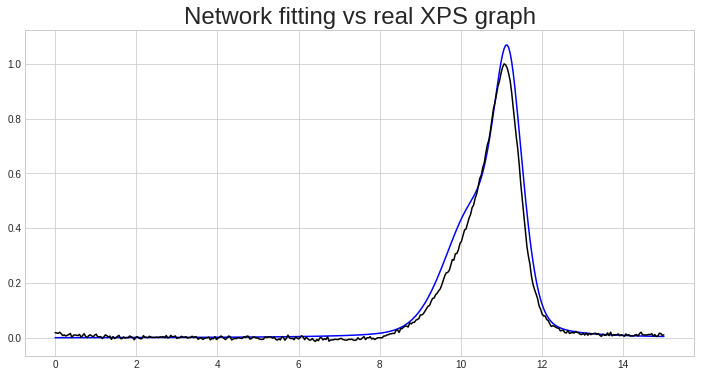

In [45]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
# plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
# plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",color='black')
plt.title("Network fitting vs real XPS graph", size = 24)

Text(0.5, 1.0, 'Predict_peak1 vs Xps_peak1')

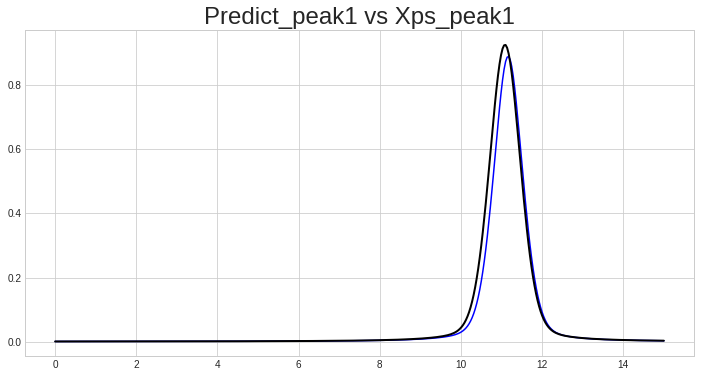

In [46]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color='black')
plt.title("Predict_peak1 vs Xps_peak1", size = 24)

Text(0.5, 1.0, 'Pre_peak2 vs Xps_peak2')

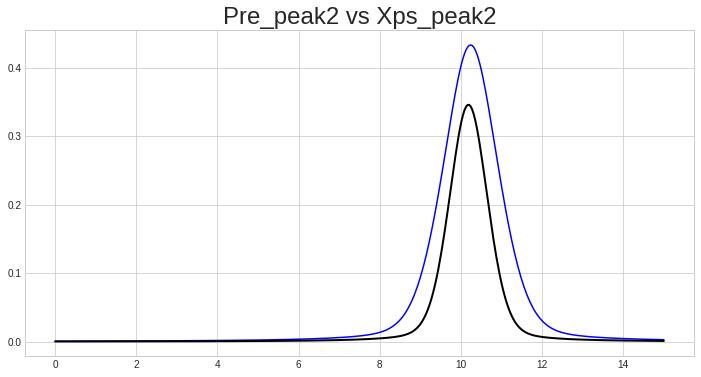

In [47]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color='blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)

Text(0.5, 1.0, 'Pre_peak3 vs Xps_peak3')

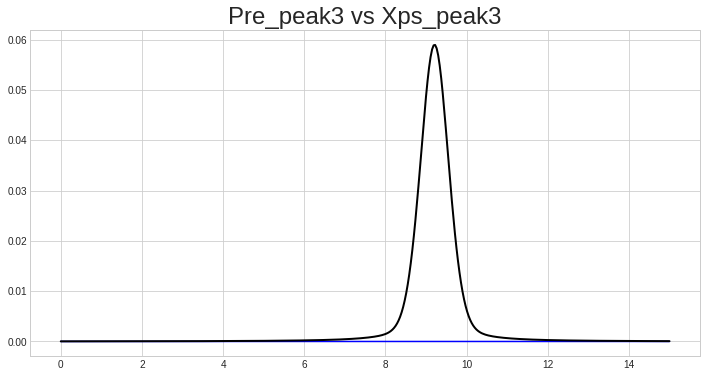

In [48]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color='blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3',color = 'black', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)

In [49]:
new_predict[1][0],new_predict[2][0],new_predict[3][0]

(0.016425326, 0.0004407391, -0.009700656)

In [50]:
new_predict[0][0]

1.9987609

In [51]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

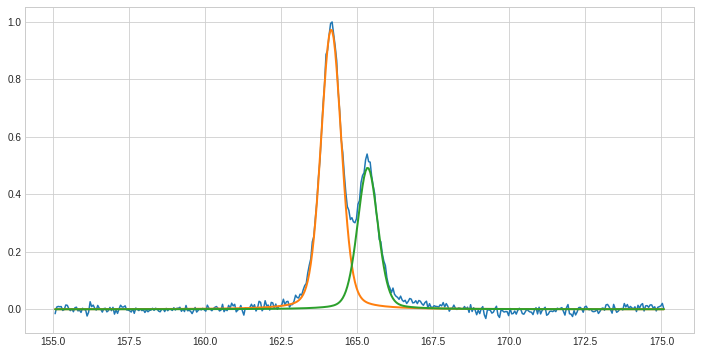

In [52]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)

In [53]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [54]:
predict = model.predict(test_result)
print(predict)

[array([[2.0016155]], dtype=float32), array([[-4.7765225e-03,  7.6242461e+00,  8.3199739e+00]], dtype=float32), array([[0.00373029, 0.6728418 , 0.40360868]], dtype=float32), array([[-0.00206465,  0.4695827 ,  0.9513234 ]], dtype=float32)]


In [55]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [56]:
print(new_predict[0].shape)  #number_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


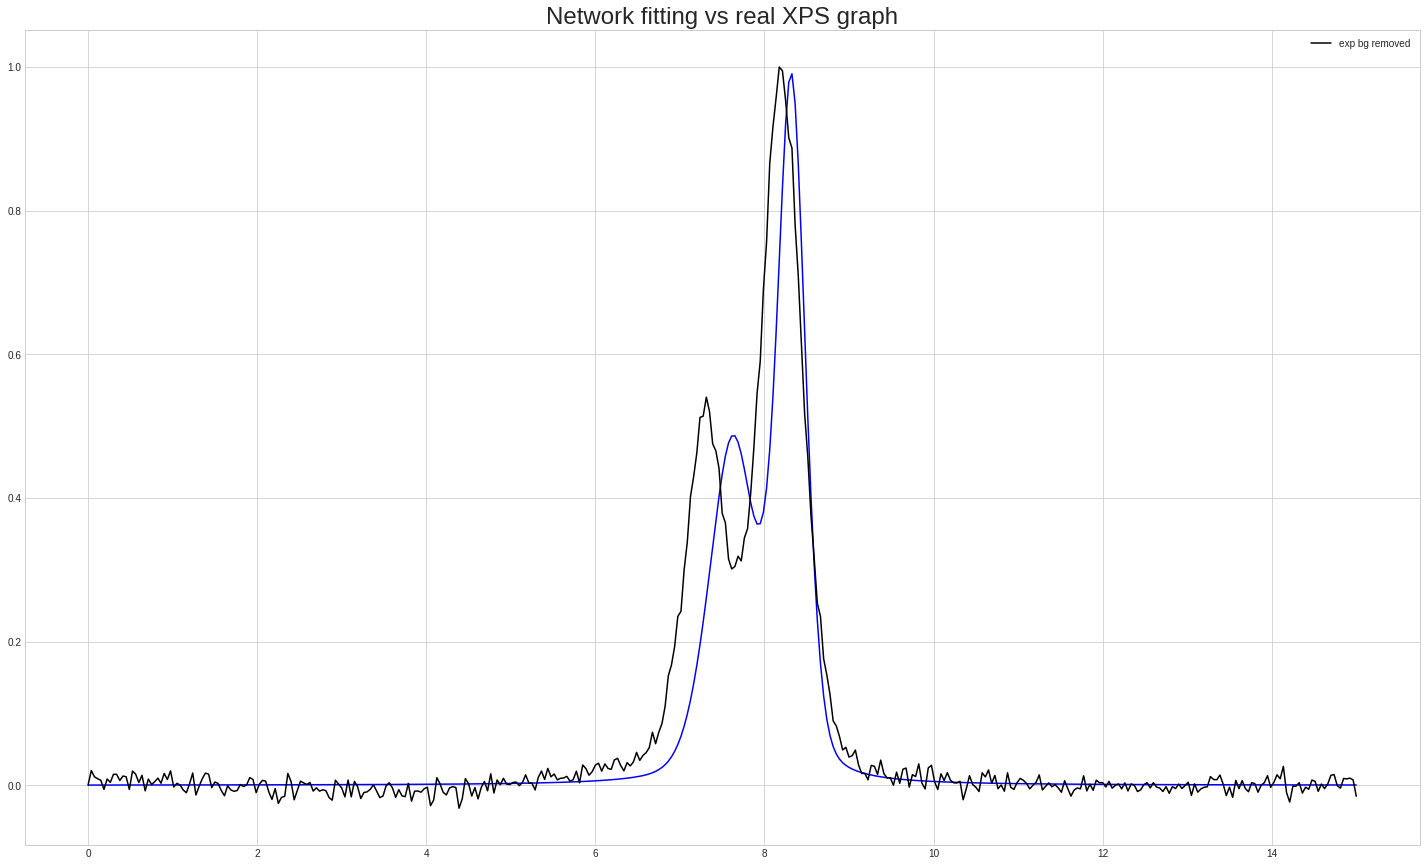

In [57]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()

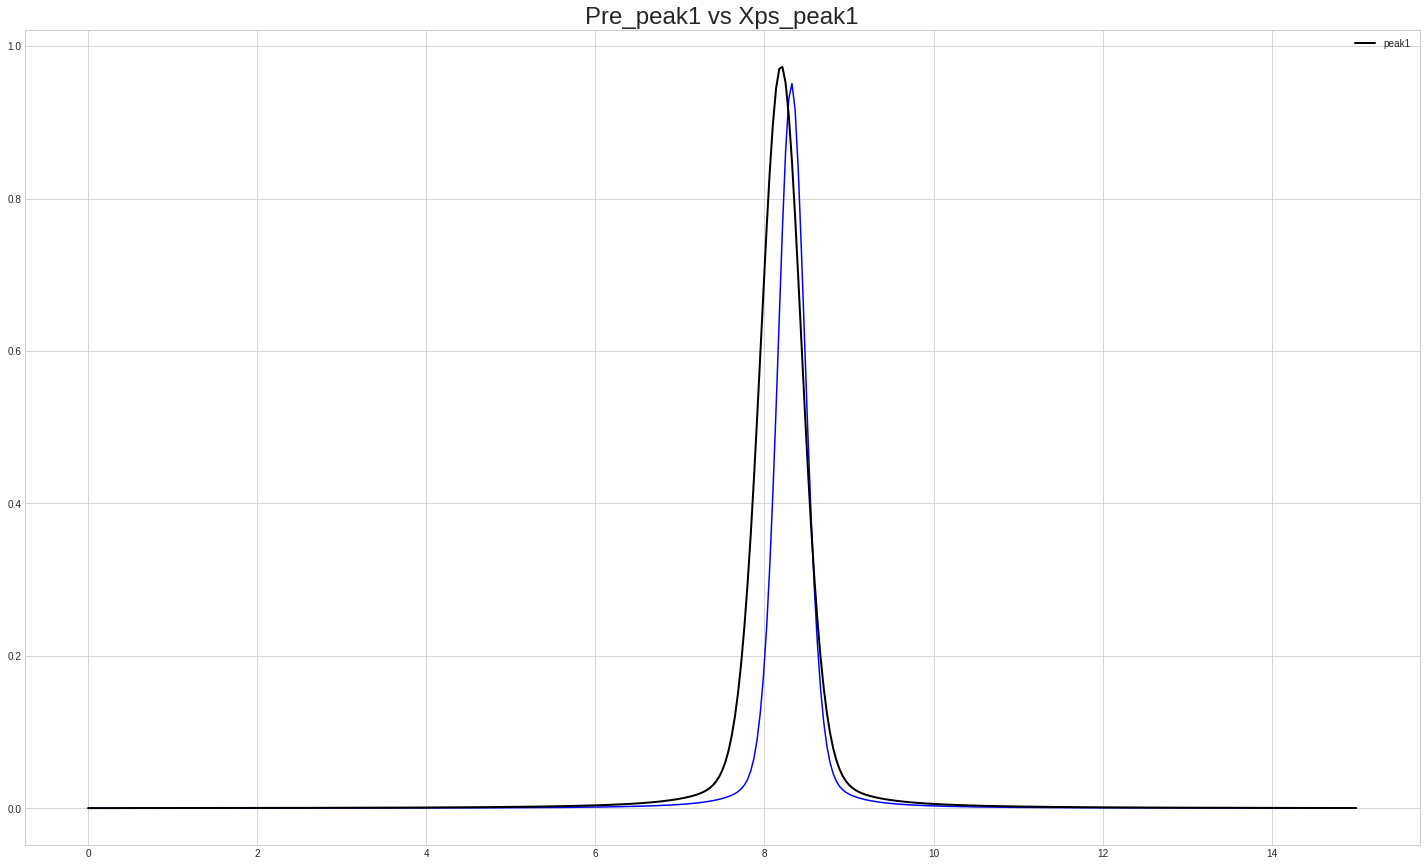

In [58]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


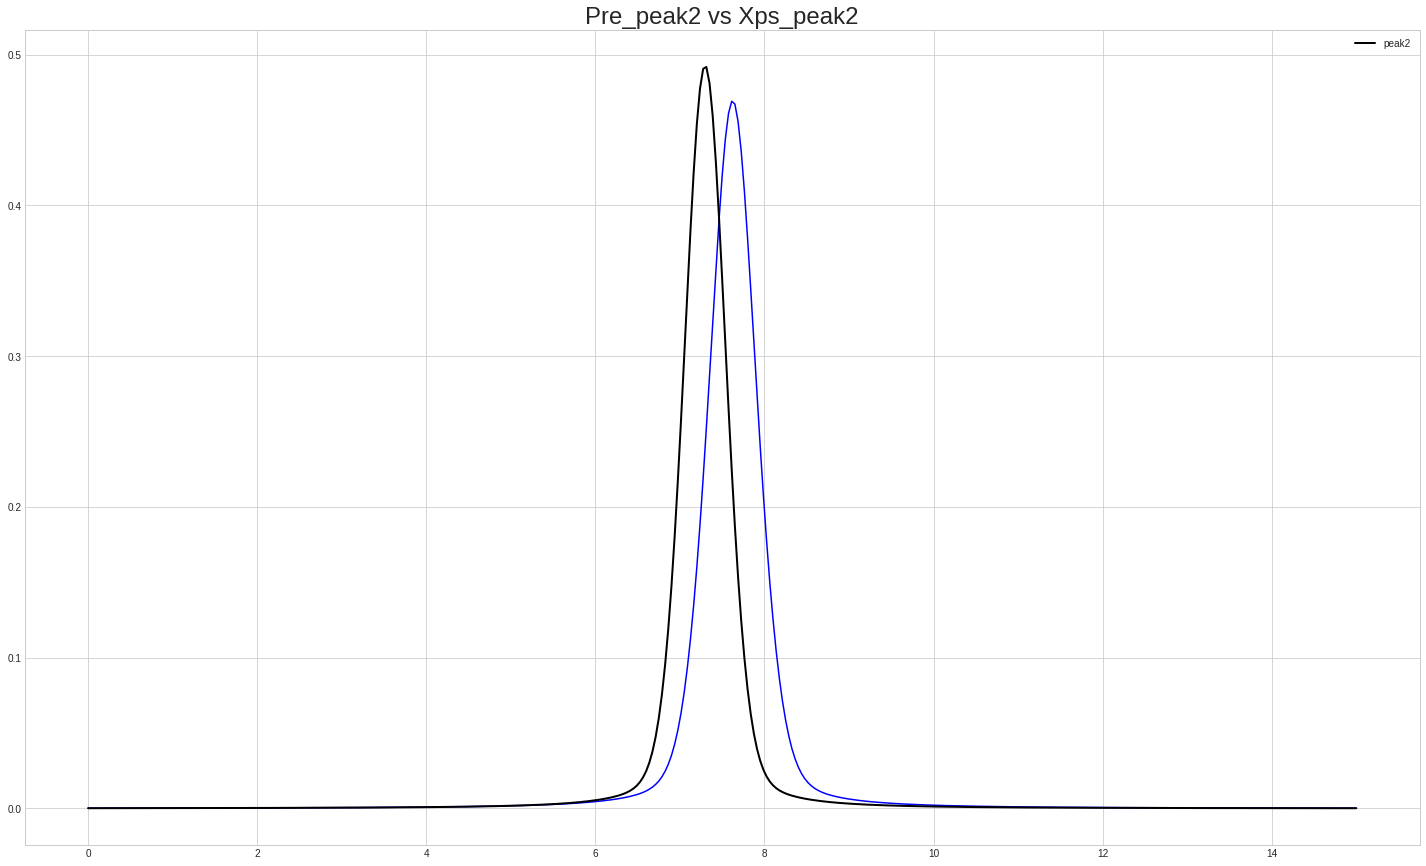

In [59]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()

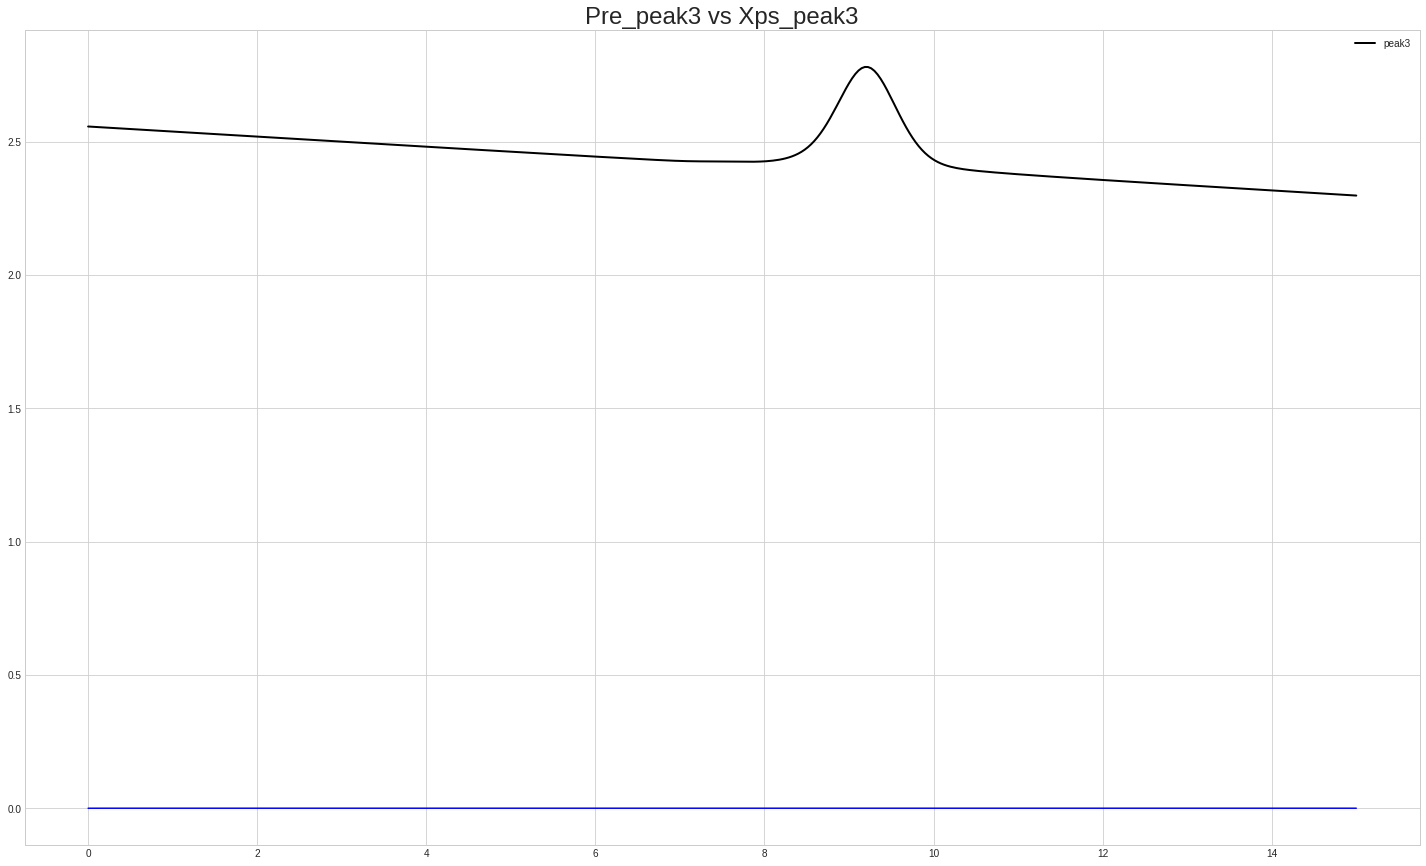

In [60]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color = 'blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()

In [61]:
error_center_total=0
for i in range(test_center.shape[0]):
    error_center_total = error_center_total + (abs(prediction[1][i]-test_center[i]))
print('error_center_total = ',error_center_total)
error_center = error_center_total/test_center.shape[0]
print('error_center =  ',error_center)
print('\n')

error_width_total=0
for i in range(test_width.shape[0]):
    error_width_total = error_width_total + (abs(prediction[2][i]-test_width[i]))
print('error_width_total = ',error_width_total)
error_width = error_width_total/test_width.shape[0]
print('error_width =  ',error_width)
print('\n')

error_amp_total=0
for i in range(test_amp.shape[0]):
    error_amp_total = error_amp_total + (abs(prediction[3][i]-test_amp[i]))
print('error_amp_total = ',error_amp_total)
error_amp = error_amp_total/test_amp.shape[0]
print('error_amp =  ',error_amp)
print('\n')

error_center_total =  [1380.23153298 2897.68747165 2407.53379626]
error_center =   [0.06901158 0.14488437 0.12037669]


error_width_total =  [1340.37560328 2424.89447711 2008.77991852]
error_width =   [0.06701878 0.12124472 0.100439  ]


error_amp_total =  [1707.93003522 2695.80457682 2354.74871212]
error_amp =   [0.0853965  0.13479023 0.11773744]




In [62]:
# 바꾼거 

#loss_wieght를 center를 0.5로 수정해줬어 (물론 가장 중요한 파라미터지만 너무 치중되지않게)


In [63]:
#수정할거

# total width를 없앨까?
# 잔차먼저
# 잔차 안되면 conv1d를 교수님거와 똑같이 해보자
# 후에 데이터 다시 새걸로 하든 2천만개로 하든 해보자

In [ ]:
# loss_weight를 만져봤지만 효과가 없었다..
# 다시 원래 비율로 두고 가자

In [ ]:
# 확인할거

# 저장한 데이터로 학습하기 3,2 error 평균 비교하기